In [1]:
import geopandas as gpd
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import datetime
import matplotlib.pyplot as plt
from scipy.stats import kendalltau
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as pe
import mapclassify

data = './data'

In [6]:
access_tract_s = gpd.read_file('./data/access/ICU_access_measures/static_measurement/ICU_access_tract_static.shp')
access_tract_s = access_tract_s.sort_values(by='GEOID')
access_tract_s = access_tract_s.reset_index(drop=True)
access_tract_s

,GEOID,County,TSA,pop,access,geometry
0,48001950100,Anderson,G,4844,0.002810,"POLYGON ((1405776.557 1097438.688, 1405779.438..."
1,48001950401,Anderson,G,4838,0.001060,"POLYGON ((1392461.585 1072740.298, 1392447.163..."
2,48001950402,Anderson,G,7511,0.000670,"POLYGON ((1379516.856 1075774.243, 1379519.198..."
3,48001950500,Anderson,G,4465,0.003524,"POLYGON ((1407370.327 1079167.289, 1407397.255..."
4,48001950600,Anderson,G,5148,0.003542,"POLYGON ((1405841.667 1069714.758, 1405850.031..."
...,...,...,...,...,...,...
5260,48505950400,Zapata,T,5399,0.000052,"POLYGON ((1054099.250 568270.286, 1054111.585 ..."
5261,48507950100,Zavala,P,1448,0.000541,"POLYGON ((1016211.351 736231.712, 1016347.303 ..."
5262,48507950200,Zavala,P,1608,0.000474,"POLYGON ((989065.623 752780.785, 989069.717 75..."
5263,48507950301,Zavala,P,2085,0.000605,"POLYGON ((988835.210 721654.610, 988835.901 72..."


In [7]:
access_tract_d = gpd.read_file(os.path.join(data, 'access/ICU_access_measures/ICU_access_tract.shp'))
access_tract_d = access_tract_d.sort_values(by='GEOID')
access_tract_d = access_tract_d.reset_index(drop=True)
access_tract_d

,GEOID,06/01/2020,06/02/2020,06/03/2020,06/04/2020,06/05/2020,06/06/2020,06/07/2020,06/08/2020,06/09/2020,...,12/23/2021,12/24/2021,12/25/2021,12/26/2021,12/27/2021,12/28/2021,12/29/2021,12/30/2021,12/31/2021,geometry
0,48001950100,0.636676,0.566900,0.565632,0.329403,0.260474,0.262326,0.260252,0.251541,0.208287,...,0.034576,0.032223,0.029081,0.027885,0.024680,0.022385,0.019416,0.017932,0.016549,"POLYGON ((1405776.557 1097438.688, 1405779.438..."
1,48001950401,0.120838,0.073134,0.075418,0.049090,0.042740,0.043147,0.042879,0.041804,0.037944,...,0.013936,0.013214,0.011652,0.011066,0.009805,0.008983,0.007605,0.007031,0.006406,"POLYGON ((1392461.585 1072740.298, 1392447.163..."
2,48001950402,0.085996,0.055994,0.057200,0.035914,0.030953,0.031189,0.030959,0.030123,0.027099,...,0.008619,0.008152,0.007229,0.006884,0.006104,0.005574,0.004738,0.004376,0.004004,"POLYGON ((1379516.856 1075774.243, 1379519.198..."
3,48001950500,0.614136,0.492877,0.495965,0.299322,0.242381,0.244504,0.242796,0.235284,0.199788,...,0.045828,0.043116,0.038472,0.036765,0.032533,0.029662,0.025372,0.023462,0.021541,"POLYGON ((1407370.327 1079167.289, 1407397.255..."
4,48001950600,0.614438,0.492358,0.495325,0.299439,0.242643,0.244786,0.243062,0.235504,0.200171,...,0.045932,0.043213,0.038566,0.036851,0.032612,0.029742,0.025440,0.023523,0.021597,"POLYGON ((1405841.667 1069714.758, 1405850.031..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5260,48505950400,0.005306,0.004605,0.004151,0.003326,0.003122,0.003202,0.003081,0.003012,0.002748,...,0.000269,0.000266,0.000257,0.000262,0.000253,0.000240,0.000229,0.000226,0.000212,"POLYGON ((1054099.250 568270.286, 1054111.585 ..."
5261,48507950100,1.635883,1.404630,1.252230,0.123598,0.113137,0.110325,0.106173,0.100374,0.073477,...,0.006376,0.006139,0.005604,0.005352,0.004593,0.004433,0.003928,0.003370,0.003038,"POLYGON ((1016211.351 736231.712, 1016347.303 ..."
5262,48507950200,1.915208,1.646452,1.468357,0.105297,0.095980,0.093381,0.089787,0.085266,0.061894,...,0.005631,0.005425,0.004932,0.004724,0.004021,0.003888,0.003385,0.002907,0.002644,"POLYGON ((989065.623 752780.785, 989069.717 75..."
5263,48507950301,2.134564,1.853795,1.649179,0.159904,0.144207,0.139620,0.134050,0.128463,0.090802,...,0.007641,0.007242,0.006646,0.006158,0.005337,0.005186,0.004511,0.003921,0.003614,"POLYGON ((988835.210 721654.610, 988835.901 72..."


In [8]:
from_date = '07/01/2020'
to_date = '12/31/2021'

start_date = datetime.datetime.strptime(from_date,  "%m/%d/%Y")
end_date = datetime.datetime.strptime(to_date,  "%m/%d/%Y")

focus_date = []
delta = datetime.timedelta(days=1)
while start_date <= end_date:
    focus_date.append(start_date.strftime("%m/%d/%Y"))
    start_date += delta
    

In [9]:
access_tract_s['access']

0       0.002810
1       0.001060
2       0.000670
3       0.003524
4       0.003542
          ...   
5260    0.000052
5261    0.000541
5262    0.000474
5263    0.000605
5264    0.000903
Name: access, Length: 5265, dtype: float64

In [10]:
access_tract_d['07/01/2020']

0       0.094370
1       0.009611
2       0.007173
3       0.079186
4       0.079082
          ...   
5260    0.000144
5261    0.015364
5262    0.013058
5263    0.018611
5264    0.029103
Name: 07/01/2020, Length: 5265, dtype: float64

In [11]:
kendalltau(access_tract_s['access'], access_tract_d['07/01/2020'])

KendalltauResult(correlation=0.2902799966542746, pvalue=6.636231307123936e-219)

In [12]:
corr_list = []

for date in focus_date:
    temp_corr = kendalltau(access_tract_s['access'], access_tract_d[date])
    if temp_corr[1] < 0.05:
        corr_list.append(temp_corr[0])
    else:
        print(f'invalid {date}')

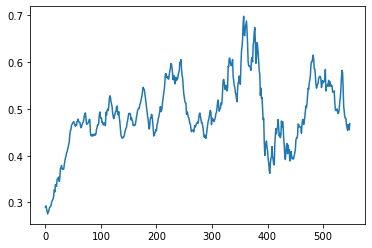

In [13]:
plt.plot(corr_list)